In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [4]:
players = pd.read_csv('Datasets/Players.csv')
stats = pd.read_csv('Datasets/Seasons_Stats.csv')

In [5]:
print(players.dtypes, '\n\n', stats.dtypes)

Unnamed: 0       int64
Player          object
height         float64
weight         float64
collage         object
born           float64
birth_city      object
birth_state     object
dtype: object 

 Unnamed: 0      int64
Year          float64
Player         object
Pos            object
Age           float64
Tm             object
G             float64
GS            float64
MP            float64
PER           float64
TS%           float64
3PAr          float64
FTr           float64
ORB%          float64
DRB%          float64
TRB%          float64
AST%          float64
STL%          float64
BLK%          float64
TOV%          float64
USG%          float64
blanl         float64
OWS           float64
DWS           float64
WS            float64
WS/48         float64
blank2        float64
OBPM          float64
DBPM          float64
BPM           float64
VORP          float64
FG            float64
FGA           float64
FG%           float64
3P            float64
3PA           float64
3P%    

In [6]:
def null_counter(data):
    for col in data.columns:
        temp_null_count = data[data[col].isnull()].shape[0]
        print('{} - {}'.format(col, temp_null_count))       
    print('\n')

In [7]:
null_counter(players)
null_counter(stats)

Unnamed: 0 - 0
Player - 1
height - 1
weight - 1
collage - 349
born - 1
birth_city - 470
birth_state - 483


Unnamed: 0 - 0
Year - 67
Player - 67
Pos - 67
Age - 75
Tm - 67
G - 67
GS - 6458
MP - 553
PER - 590
TS% - 153
3PAr - 5852
FTr - 166
ORB% - 3899
DRB% - 3899
TRB% - 3120
AST% - 2136
STL% - 3899
BLK% - 3899
TOV% - 5109
USG% - 5051
blanl - 24691
OWS - 106
DWS - 106
WS - 106
WS/48 - 590
blank2 - 24691
OBPM - 3894
DBPM - 3894
BPM - 3894
VORP - 3894
FG - 67
FGA - 67
FG% - 166
3P - 5764
3PA - 5764
3P% - 9275
2P - 67
2PA - 67
2P% - 195
eFG% - 166
FT - 67
FTA - 67
FT% - 925
ORB - 3894
DRB - 3894
TRB - 379
AST - 67
STL - 3894
BLK - 3894
TOV - 5046
PF - 67
PTS - 67




In [11]:
players.dropna(subset=['Player'], how='all', inplace = True)
stats.dropna(subset=['Player'], how='all', inplace = True)

In [12]:
def nul_deletion(data, coef):
    for col in data.columns:
        temp_null_count = data[data[col].isnull()].shape[0]
        if temp_null_count>data[col].shape[0]*coef:
            del data[col]
        else:
            if data[col].dtype != 'O':
                data[col]=data[col].fillna(data[col].median())
            else:
                data.fillna(method='bfill', inplace =True)
                data.fillna(method='ffill', inplace =True)

In [13]:
nul_deletion(players, 0.3)
nul_deletion(stats, 0.3)

In [14]:
null_counter(players)
null_counter(stats)

Unnamed: 0 - 0
Player - 0
height - 0
weight - 0
collage - 0
born - 0
birth_city - 0
birth_state - 0


Unnamed: 0 - 0
Year - 0
Player - 0
Pos - 0
Age - 0
Tm - 0
G - 0
GS - 0
MP - 0
PER - 0
TS% - 0
3PAr - 0
FTr - 0
ORB% - 0
DRB% - 0
TRB% - 0
AST% - 0
STL% - 0
BLK% - 0
TOV% - 0
USG% - 0
OWS - 0
DWS - 0
WS - 0
WS/48 - 0
OBPM - 0
DBPM - 0
BPM - 0
VORP - 0
FG - 0
FGA - 0
FG% - 0
3P - 0
3PA - 0
3P% - 0
2P - 0
2PA - 0
2P% - 0
eFG% - 0
FT - 0
FTA - 0
FT% - 0
ORB - 0
DRB - 0
TRB - 0
AST - 0
STL - 0
BLK - 0
TOV - 0
PF - 0
PTS - 0




Age возраст игрока
height Рост игрока
weight Вес игрока
G Сыгранные игры  
GS Сыгранные игры в стартовом составе  
PER Рейтинг эффективности игрока  
3PAr% Процент трехочковых  
FTr% Процент свободных бросков  
ORB% Процент подборов при игре в атаке  
DRB% Проецнт подборов при игре в защите  
AST% Процент голевых передач  
STL% Процент перехватов  
BLK% Процент заблокированных бросков  
TOV% Процент переворотов (перехватов мяча до броска)  
USG% Процент использования игроков при розыгрыше  
OWS Вклад игрока в атаку   
DWS Вклад игрока в защиту  
WS/48 Вклад игрока в победу за все время игры (48 минут)  
OBPM Балловый показатель эффективности баскетболиста в атаке  
DBPM Балловый показатель эффективности баскетболиста в защите  
VORP Эффективность относительно заменяющего игрока  
3P Трехочковые  
2P Двухочковые  
2PA Доля двухочковых  
eFG% Эффективность набора очков в процентах  
FT% Проецнт свободных бросков  
ORB Количество подборов в атаке  
DRB Количетсво подборов в защите  
TRB Общее количество подборов  
AST Голевые передачи  
STL Перехваты  
BLK Блоки  
TOV Перехваты до броска  
PF Фолы  
PTS Заработанные очки  

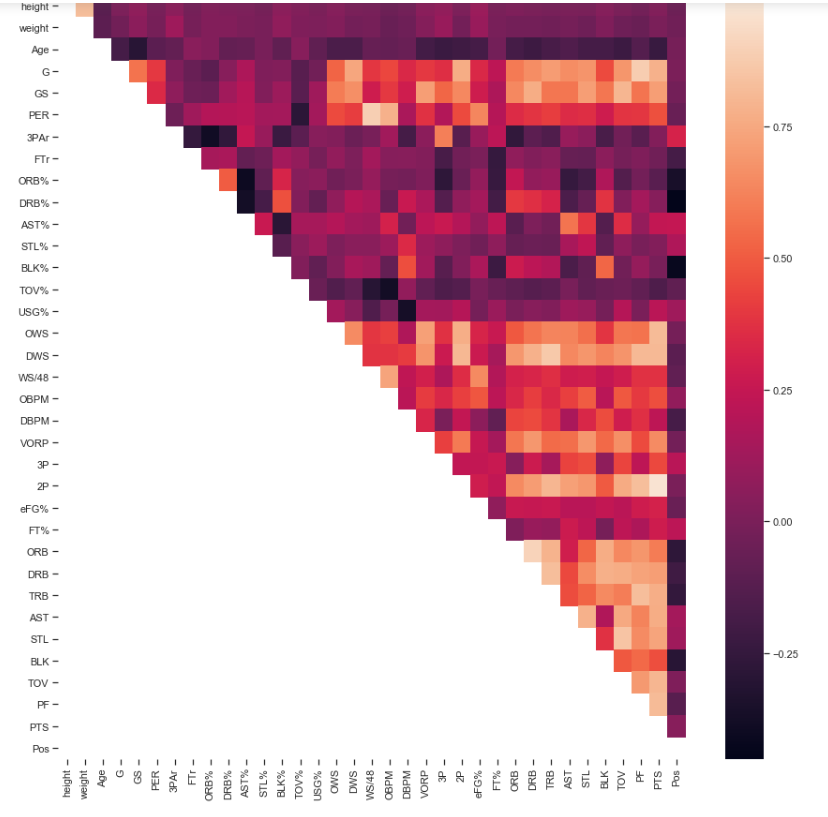